<a href="https://colab.research.google.com/github/ductu112/demo-repo/blob/main/Interacting_Gene_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modules
import itertools as it
from itertools import combinations
from operator import sub
import numpy as np
import math as math
import scipy.special as sp
import matplotlib.pyplot as plt


The share Dropbox folder is here.
https://www.dropbox.com/scl/fo/wldvkwtc67y6jhydez5ct/h?rlkey=hf6ztp6ojt0hpdal4vo6wgc7q&dl=0


# Notation
- n codeword length, e.g. [10001000], n = 8
- s maximum interactions, e.g. s = 2, means up to 2 codewords Boolean sum.
- d minimum distance, e.g. Hamming distance between any 2 distinct codewords and their Boolean sums of up to s words
- M maximum size of codebook
- NOTE: In the following parts, we consider each row as a codeword. For example, the constant-weight code n=23, w=7, M=20 means that each row (gen/codeword) has 23 bits with seven 1s and sixteen 0s. There are 20 rows like that.

Target the following tasks:
- n = 23, s = 2, d > 5, M = 20
- n = 50, s = 2/3/4/5/6, d > 3, M = ?
- n = ?, s = 2/3/4/5/6, d > 2/3, M = 10,000 (transcriptome-scale)
- n = ?, s = 2/3/4/5/6, d > 3, M = 100,000 (genome-scale)
- n = 100, s = 3, d = 1, M = 100,000 (genome-scale)?
- n = 23, s = 2, d > 5, M = 20 (preliminary data)

# Update note from 3-Oct
- What is our first experiment???? (DNA FISH? of 49 genes with 35 bits)
- Non-interacting control (?)
- 100% interacting control (adjacent DNA segment)
- Non-barcoded control
- Goal is to calculate correlation of percentage of colocalized spot pairs versus hi-c frequency (Finn et al Cell, 2019)
- Need codebook from Tu and Han Mao
- Need to decide on genes
- Need to grow IMR90 cell lines
- We could have 4 extra bits (39 bits = 13 hybridization rounds), 2 sets of non-barcoded control?

In [ ]:
# Pair of OR
# Inputs and Outputs are strings
def AorB(a,b):
  aorb = ''
  for i in range(len(a)):
    if a[i]=='1' or b[i]=='1':
      aorb += '1'
    else:
      aorb += '0'
  return aorb

In [ ]:
# Distance function
def dist(a,b):
  return sum([1 for i in range(len(a)) if a[i]!=b[i]])

In [ ]:
# Here is the Constant-Weight code with n = 23, weigth w = 7, distance of the constant weigth code is 10.
code = ['00000111001000101100000',
'00001011100001010010000',
'00001100100010000101010',
'00010010100100001001100',
'00010101010000000010110',
'00011000011000010001001',
'00100010010110000110000',
'00100100101001000000101',
'00101001000100100000011',
'00110000000011111000000',
'01000010010001100001010',
'01000100000100011010001',
'01001000001010100010100',
'01100001000000010101100',
'10000010000010010000111',
'10001000010001001100100',
'10010000100000100110001',
'10100000001000001011010',
'11000001111100000000000',
'11111110000000000000000']
#####
M = len(code) # M is the number of rows (genes/codewords)
n = len(code[0]) # Each row has length n
#####
# The orCode contains 20 genes + (20 choose 2) interacted genes.
# The genes interaction here is consider with OR operation.
orCode = code[:]
for i in range(M):
  for j in range(i+1,M):
    a = code[i]
    b = code[j]
    orCode+= [AorB(a,b)]

MM = len(orCode)
print('M = ',M)
print('Size of the code with 2 genes interacting is',MM)
#####
# Find the minimum distance of the orCode
min_dist = n
distribution_distance = {}
for i in range(MM):
  for j in range(i+1,MM):
    test1 =  orCode[i]
    test2 =  orCode[j]
    if dist(test1,test2) < min_dist:
      min_dist = dist(test1,test2)
    if dist(test1,test2) not in distribution_distance:
      distribution_distance[dist(test1,test2)] = 1
    else:
      distribution_distance[dist(test1,test2)] += 1

print('Minimum distance of the Interacting Gene Code is d = ',min_dist)
print()
print('The distribution of the distance is ',distribution_distance)

M =  20
Size of the code with 2 genes interacting is 210
Minimum distance of the Interacting Gene Code is d =  5

The distribution of the distance is  {10: 2318, 12: 6006, 5: 342, 6: 1212, 11: 2191, 13: 2794, 15: 513, 14: 3744, 17: 25, 18: 9, 7: 418, 16: 549, 8: 1571, 9: 252, 19: 1}


In [ ]:
def convert(symbol,q):
  # This function converts q-ary symbols to binary symbols
  # The simple one is 0 = (1,0, ... 0), 1= (0,1,...,0)
  return [0]*symbol + [1] + [0]*(q-1-symbol)

Summary for the following code.

- "codebook" is the binary constant-weight code of length n=35, with M=49 codewords (rows), weight w=5.

- "codebook" is indeed a 4-disjunct code. We checked that the boolean sum of every 4 rows are different.

- Consider 49 codewords and $\binom{49}{2}$ OR codewords. This means that if we allow s=2 genes interact, the distance of the new code is 4.

- Consider 49 codewords, $\binom{49}{2}$ OR codewords, and $\binom{49}{3}$ OR codewords. This means that if we allow s=3 genes interact, the distance of the new code is 3.


In [ ]:
# Here is the description of the code, but we can ignore if it is unnecessary for the experiment.
# The Shortened RS-Code
# q0 = 7, k = 2, n = 5
q = 7
n = 5
k = 2
Field = [0,1,2,3,4,5,6]
Eval_points = [1,2,3,4,5] # n=5

# Codeword = {(f(0), f(1), f(2),f(3),f(4),f(5),f(6)): f = f0+f1*x+f2*x^2+ ... +f_(k-1)*x^k}
# Here f_i in GF(7) are coeffients of polynomial f.
# Each value of f_i corresponds to value of position i in the message.
codebook = []
for f in it.product(Field, repeat=k):
  check = []
  for alpha in Eval_points:
    symbol = sum(f[i]*alpha**i for i in range(k))%q
    check += convert(symbol,q)
    codeword = ''.join([str(_) for _ in check])
  codebook += [codeword]
for x in codebook:
  print(x)

10000001000000100000010000001000000
01000000010000000100000001000000010
00100000000100000000101000000001000
00010000000001001000000000100100000
00001000100000000001000100000000001
00000100001000010000000000010000100
00000010000010000010000010000010000
01000000100000010000001000000100000
00100000001000000010000000100000001
00010000000010100000000100000000100
00001001000000000100000000010010000
00000100010000000000100010001000000
00000010000100001000010000000000010
10000000000001000001000001000001000
00100000010000001000000100000010000
00010000000100000001000000011000000
00001000000001010000000010000000010
00000100100000000010010000000001000
00000010001000100000000001000100000
10000000000010000100001000000000001
01000001000000000000100000100000100
00010000001000000100000010000001000
00001000000010000000110000000100000
00000101000000001000000001000000001
00000010010000000001001000000000100
10000000000100010000000000100010000
01000000000001000010000100001000000
0010000010000010000000000001

# Correct table 2 from Lectures on Designing Screening Problem

In [ ]:
# prompt: I want to split a long string into substrings of length 7, I want to copy a long string from outside, my outside txt file has \n, but I dont want it

with open('input.txt', 'r') as f:
  data = f.read().replace('\n', '')
  # split data into substrings of length 7
  data = [data[i:i + 7] for i in range(0, len(data), 7)]
  # print the substrings
  print(data)
print(len(data))


['40E8108', '038A208', '42700A0', '25C1010', '03A1120', '12026C0', '09068C0', '1582140', '09010B8', '108EC00', '080A443', '0A20B80', '4158210', '0214413', '16C0808', '0901740', '0390890', '1124043', '0910A03', '3920210', '2087240', '5912400', '2241068', '4208720', '4090170', '0C040A3', '0E810C0', '2080A38', '2021445', '040A270', '0092216', '10145A0', '101208B', '2112380', '1138808', '0A27400', '02408C3', '6A02140', '4040A26', '2410143', '0417090', '1709400', '46A0210', '08C5820', '010C40D', '0940416', '0F42020', '2080DC0', '1013A20', '6889400', '110A026', '4120590', '0468890', '3890108', '1140870', '42080D8', '2404215', '20240F0', '04216A0', '442080B', '0874110', '1441203', '0894045', '1080923', '216A400', '208A105', '1205940', '4114086', '1202138', '1010C46', '08BA020', '0421158', '2700A40', '0142245', '71010C0', '0809225', '0A10126', '040DA08', '0DA0C00', '4710108', '2246810', '020910B', '20C040B', '080C690', '4042113', '1089380', '2115C00', '6814220', '14080C5', '00A4426', '6940808'

In [ ]:
# prompt: list all character of 16-ary and their binary presentation, but I dont want 0b, I want each representation has length 4
x = []
y = {}
for i in range(16):
  x +=  [bin(i)[2:].zfill(4)]
  if i < 10:
    y[str(i)] = bin(i)[2:].zfill(4)
  elif i == 10:
    y['A'] = bin(i)[2:].zfill(4)
  elif i == 11:
    y['B'] = bin(i)[2:].zfill(4)
  elif i == 12:
    y['C'] = bin(i)[2:].zfill(4)
  elif i == 13:
    y['D'] = bin(i)[2:].zfill(4)
  elif i == 14:
    y['E'] = bin(i)[2:].zfill(4)
  elif i == 15:
    y['F'] = bin(i)[2:].zfill(4)
print(x)
print(y)

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
{'0': '0000', '1': '0001', '2': '0010', '3': '0011', '4': '0100', '5': '0101', '6': '0110', '7': '0111', '8': '1000', '9': '1001', 'A': '1010', 'B': '1011', 'C': '1100', 'D': '1101', 'E': '1110', 'F': '1111'}


In [ ]:
def hex2bin(input):
  n = len(input)
  output = ''
  # input has string format
  # output has length 4n
  for x in input:
    output += y[x]
  return output

In [ ]:
codebook = []
for hexval in data:
    codebook += [hex2bin(hexval)[1:]]
check_len = []
check_weight = []
check_first = 0
for code in codebook:
  if len(code) not in check_len:
    check_len += [len(code)]
  if code.count('1') not in check_weight:
    check_weight += [code.count('1')]
print(len(codebook))
print(check_weight )
print(check_len)

# Here I got 303 binary codewords of length 27, weight 7, distance 8.
# We need to check 2-disjunct.
# Is there a good way to answer they are 2-disjunct?
# Yes, if s*lambda \leq w-1, the the code is s-disjunct.
# But, if the condition is not correct, how can we check?


303
[7]
[27]


## Another correction


In [ ]:
with open('10_7_CWC.txt', 'r') as f:
  CWC_10_7 = f.read().replace('\n', '')
  # split data into substrings of length 7
  CWC_10_7 = [CWC_10_7[i:i + 13] for i in range(0, len(CWC_10_7), 13)]
  # print the substrings
  print(CWC_10_7)
print(len(CWC_10_7))

['10100803000A0', '1001402080802', '1002018042004', '1020040420140', '1004104011008', '1000A00808201', '1008021004410', '1001020822008', '1000811101040', '1004080404801', '1010202010404', '1020400240210', '1008108080120', '1002044008082', '1002102004240', '1004040840420', '1001204100110', '1008010208808', '1000820480084', '1020081012002', '1010408021001', '1020014080401', '101010040A010', '10084008100C0', '1004028100202', '1002201020820', '1001040205004', '1000882040108', '1004401008104', '1020208004088', '1000900220402', '1002080881010', '1008042102001', '1010024040840', '1001010410220', '1000848010810', '1008084020204', '1020022009020', '1001101040081', '1010010804102', '1002400500408', '1004200282040', '1008200441002', '1002020210101', '1010041080208', '1000C04006020', '1001088008440', '1004012020090', '1020100900804', '0801208080204', '0800824008408', '0804042010102', '0810401100810', '0820080820081', '0808010406040', '0802100241020', '0800900500101', '0808040280090', '082020104044

In [ ]:
codebook_10_7 = []
for hexval in CWC_10_7:
    codebook_10_7 += [hex2bin(hexval)[3:]]
check_len = []
check_weight = []
check_first = 0
for code in codebook_10_7:
  if len(code) not in check_len:
    check_len += [len(code)]
  if code.count('1') not in check_weight:
    check_weight += [code.count('1')]
print(len(codebook_10_7))
print(check_weight )
print(check_len)


385
[7]
[49]


In [ ]:
# prompt: given a list of binary strings of same length and weight. Take 3 arbitrary strings named A,B,C. we want to make sure A OR B OR C not equal to A OR B

def is_3disjunct(A,B,C):
  aorb = AorB(A,B)
  aorc = AorB(A,C)
  borc = AorB(B,C)
  return aorb!=borc


In [ ]:
# Here is the description of the code, but we can ignore if it is unnecessary for the experiment.
# The Shortened RS-Code
# q0 = 7, k = 2, n = 5
q = 7
n = 5
k = 2
Field = [0,1,2,3,4,5,6]
Eval_points = [1,2,3,4,5] # n=5

# Codeword = {(f(0), f(1), f(2),f(3),f(4),f(5),f(6)): f = f0+f1*x+f2*x^2+ ... +f_(k-1)*x^k}
# Here f_i in GF(7) are coeffients of polynomial f.
# Each value of f_i corresponds to value of position i in the message.
codebook = []
for f in it.product(Field, repeat=k):
  check = []
  for alpha in Eval_points:
    symbol = sum(f[i]*alpha**i for i in range(k))%q
    check += convert(symbol,q)
    codeword = ''.join([str(_) for _ in check])
  codebook += [codeword]

#####
# Here is the code with n=35, w=5, M=49.

import sys
file = open('output.txt', 'a')
sys.stdout = file
for codeword in codebook:
  print(codeword)
print(len(codebook))
file.close()

In [ ]:
!jupyter nbconvert --to html /content/Interacting_Gene_Code.ipynb

[NbConvertApp] WARNING | pattern '/content/Interacting_Gene_Code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=

Summarize Table 1 of the paper "Lectures on Designing Screening Experiments".

In [ ]:
s = [s for s in range(2,9)]
m = [m for m in range(5,31)]
Table = {} # (s,m)
# s = 2
Table[(2,6)] = (4,2,20)
Table[(2,8)] = (7,2,35)
Table[(2,9)] = (8,2,40)
Table[(2,11)]= (7,3,49)
Table[(2,12)] = (8,3,56)
Table[(2,15)] = (8,4,72)
Table[(2,17)] = (11,4,99)
Table[(2,18)] = (13,4,117)
Table[(2,20)] = (11, 5, 121)
Table[(2,22)] = (13,5,143)
Table[(2,25)] = (13, 6, 169)
Table[(2,28)] = (16, 6, 208)

# s = 3
Table[(3,5)] = (7, 1, 28)
Table[(3,6)] = (8, 1, 32)
Table[(3,8)] = (7, 2, 49)
Table[(3,9)]= (8, 2, 56)
Table[(3,10)] = (11, 2, 77)
Table[(3,12)] = (9, 3, 90)
Table[(3,13)] = (11, 3, 110)
Table[(3,14)] = (13, 3, 130)
Table[(3,16)] = (16, 3, 160)
Table[(3,18)] = (13, 4, 169)
Table[(3,20)] = (16, 4, 208)
Table[(3,24)] = (16, 5, 256)
Table[(3,25)] = (19, 5, 304)
Table[(3,29)] = (19, 6, 361)

# s = 4
Table[(4,5)] = (7, 1, 35)
Table[(4,6)] = (8, 1, 40)
Table[(4,7)] = (13, 1, 65)
Table[(4,9)]= (8, 2, 72)
Table[(4,10)] = (11, 2, 99)
Table[(4,11)] = (13, 2, 117)
Table[(4,12)] = (16, 2, 144)
Table[(4,14)] = (13, 3, 169)
Table[(4,16)] = (16, 3, 208)
Table[(4,20)] = (16, 4, 272)
Table[(4,21)] = (19, 4, 323)
Table[(4,22)] = (23, 4, 391)
Table[(4,23)] = (25, 4, 425)
Table[(4,27)] = (23, 5, 483)
Table[(4,28)] = (27, 5, 702)
Table[(4,29)] = (29, 5, 609)

# s = 5
Table[(5,5)] = (7, 1, 42)
Table[(5,6)] = (8, 1, 48)
Table[(5,7)] = (13, 1, 78)
Table[(5,8)]= (16, 1, 96)
Table[(5,10)] = (11, 2, 121)
Table[(5,11)] = (13, 2, 143)
Table[(5,12)] = (16, 2, 176)
Table[(5,13)] = (23, 2, 253)
Table[(5,16)] = (16, 3, 256)
Table[(5,18)] = (23, 3, 368)
Table[(5,19)] = (27, 3, 432)
Table[(5,22)] = (23, 4, 483)
Table[(5,23)] = (25, 4, 525)
Table[(5,24)] = (27, 4, 609)
Table[(5,28)] = (25, 5, 650)
Table[(5,29)] = (29, 5, 754)
Table[(5,30)] = (32, 5, 832)

# s = 6
Table[(6,5)] = (7, 1, 49)
Table[(6,6)] = (8, 1, 56)
Table[(6,7)] = (13, 1, 91)
Table[(6,8)]= (16, 1, 112)
Table[(6,9)] = (23, 1, 161)
Table[(6,11)] = (13, 2, 169)
Table[(6,12)] = (16, 2, 208)
Table[(6,13)] = (23, 2, 299)
Table[(6,14)] = (27, 2, 351)
Table[(6,16)] = (19, 3, 361)
Table[(6,18)] = (23, 3, 437)
Table[(6,19)] = (27, 3, 513)
Table[(6,20)] = (32, 3, 608)
Table[(6,23)] = (25, 4, 625)
Table[(6,24)] = (29, 4, 725)
Table[(6,25)] = (32, 4, 800)
Table[(6,26)] = (37, 4, 925)
Table[(6,29)] = (31, 5, 961)
Table[(6,30)] = (32, 5, 992)

# s = 7
Table[(7,6)] = (9, 1, 72)
Table[(7,7)] = (13, 1, 104)
Table[(7,8)]= (16, 1, 128)
Table[(7,9)] = (23, 1, 184)
Table[(7,12)] = (16, 2, 240)
Table[(7,13)] = (23, 2, 345)
Table[(7,14)] = (27, 2, 405)
Table[(7,15)] = (32, 2, 480)
Table[(7,18)] = (23, 3, 506)
Table[(7,19)] = (27, 3, 594)
Table[(7,20)] = (32, 3, 704)
Table[(7,24)] = (29, 4, 841)
Table[(7,25)] = (32, 4, 928)
Table[(7,26)] = (37, 4, 1073)
Table[(7,27)] = (43, 4, 1247)

# s = 8
Table[(8,6)] = (11, 1, 99)
Table[(8,7)] = (13, 1, 117)
Table[(8,8)]= (16, 1, 144)
Table[(8,9)] = (23, 1, 207)
Table[(8,12)] = (16, 2, 272)
Table[(8,13)] = (23, 2, 391)
Table[(8,14)] = (27, 2, 459)
Table[(8,15)] = (32, 2, 544)
Table[(8,18)] = (25, 3, 625)
Table[(8,19)] = (27, 3, 675)
Table[(8,20)] = (32, 3, 800)
Table[(8,21)] = (41, 3, 1025)
Table[(8,25)] = (32, 4, 1056)
Table[(8,26)] = (37, 4, 1221)
Table[(8,27)] = (43, 4, 1419)
Table[(8,28)] = (49, 4, 1617)
#print(Table)

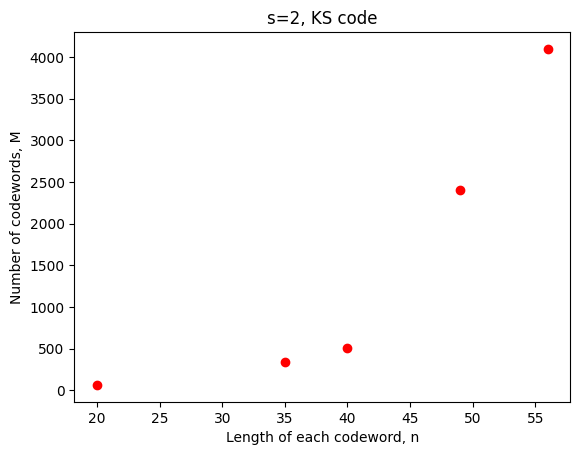

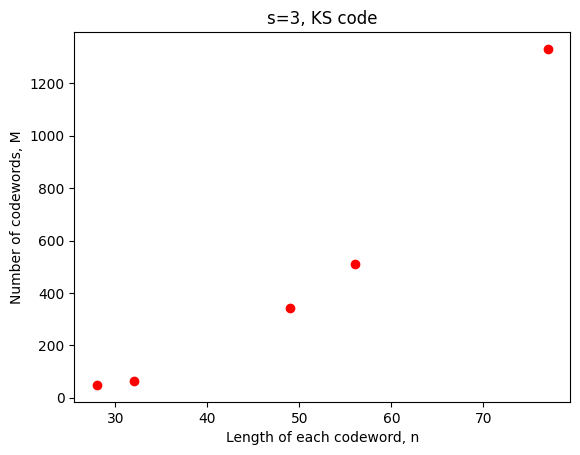

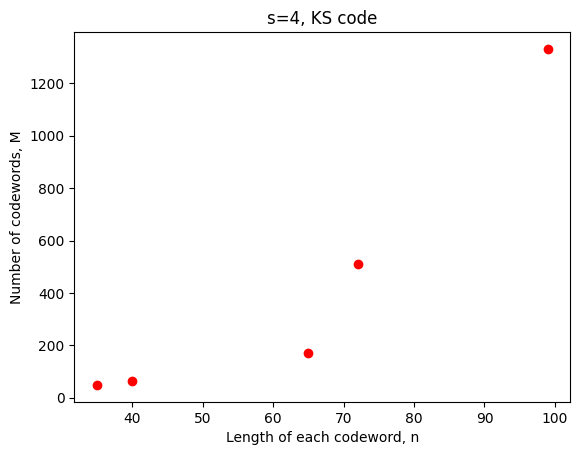

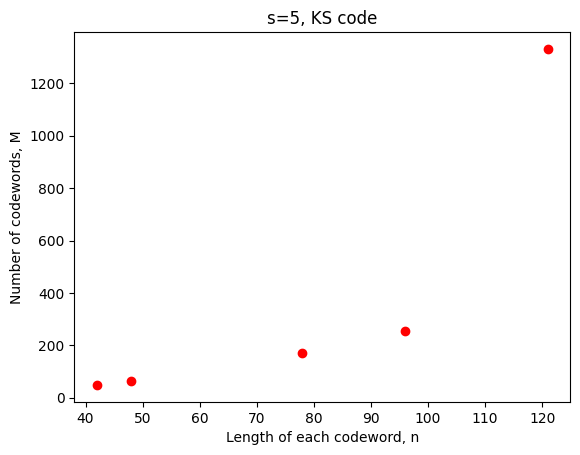

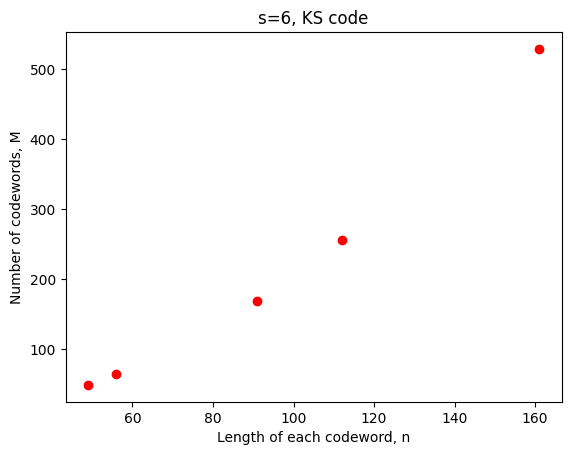

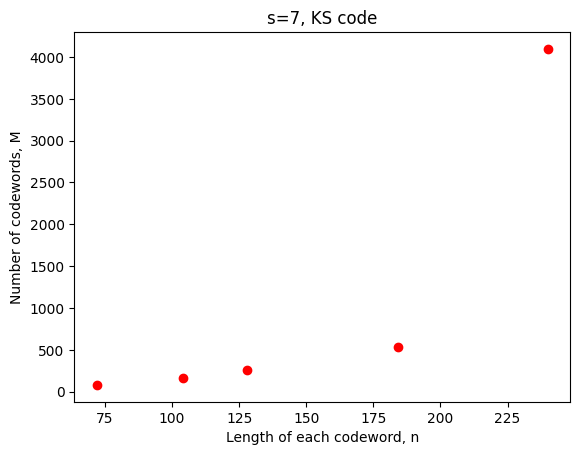

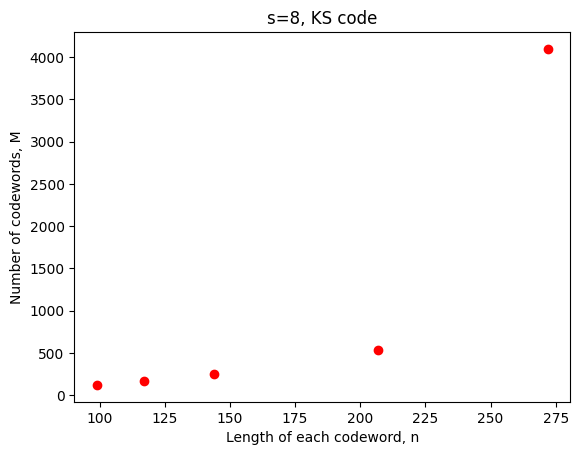

In [ ]:
#plt.figure(figsize=(9, 7))

for interact in s:
  horizon = []
  vertical = []
  for x in Table:
    if x[0] == interact:
      horizon += [Table[x][0]**(Table[x][1]+1)]
      vertical += [Table[x][2]]
  plt.plot(vertical[0:5], horizon[0:5], 'ro')
  plt.xlabel('Length of each codeword, n')
  plt.ylabel('Number of codewords, M')
  plt.title('s={}, KS code'.format(interact))
  plt.show()


Table 2

In [ ]:
n_s2 = {}
t = [12,
13,
17,
20,
26,
28,
42,
48, 68, 'NA',
76,84,
120,176, 253, 'NA',
254, 260,278, 296, 300, 327, 362, 403, 442,494, 555,622,696,785, 869,965,
1095, 1206, 1344, 1471,
1764, 1795, 1976,
2304, 2401]
Length2 = []
Size2 = []
for N in range(9,50):
  # N contain (D,w,lambda, t)
  if N != 18 and N!= 24:
    Length2 += [N]
    Size2 += [t[N-9]]
    #print(t[N-9])
    n_s2[N] = (4,3,1,t[N-9])
#print(n_s2)

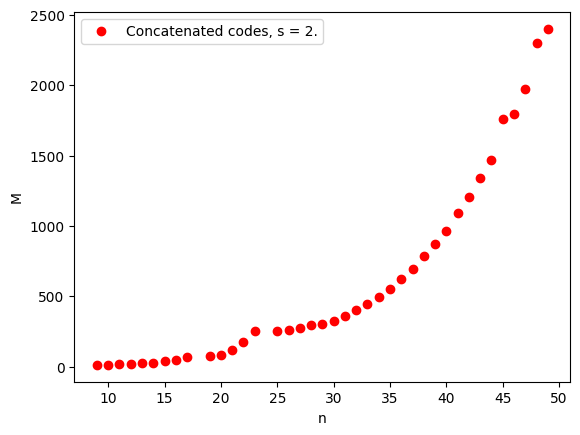

In [ ]:
plt.plot(Length2, Size2, 'ro', label = 'Concatenated codes, s = 2.')
plt.xlabel('n')
plt.ylabel('M')
plt.legend()
plt.show()

In [ ]:
n_s3 = {}
T = [20 ,'NA' ,22 ,25 ,30 ,31 ,37 ,40 ,42 ,50 ,52 ,54 ,63 ,65 ,67 ,76 ,80 ,82 ,92 ,96 ,99 ,111 ,114 ,117 ,130 ,133 ,136 ,149 ,154 ,157 ,171 ,176 ,180 ,343]
Length3 = []
Size3 = []
for N in range(16,50):
  # N contain (D,w,lambda, t)
  if N != 17:
    Length3 += [N]
    Size3 += [t[N-16]]
    n_s3[N] = (4,3,1,t[N-16])
#print(n_s2)

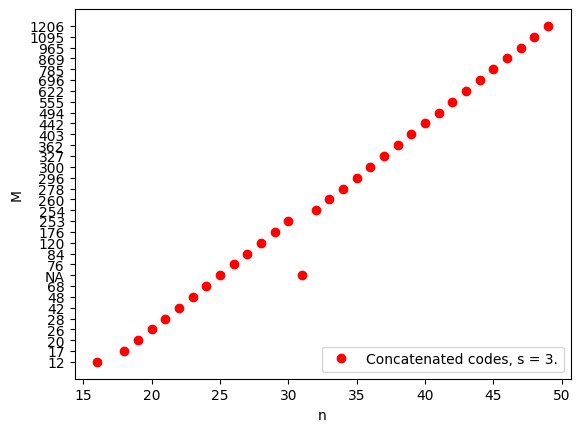

In [ ]:
plt.plot(Length3, Size3, 'ro', label = 'Concatenated codes, s = 3.')
plt.xlabel('n')
plt.ylabel('M')

horizon = []
vertical = []
for x in Table:
  if x[0] == 3:
    horizon += [Table[x][0]**(Table[x][1]+1)]
    vertical += [Table[x][2]]
#plt.plot(vertical[1:2], horizon[1:2], 'go', label = 'Generalized KS code, s=3.' )

plt.legend(loc='lower right')
plt.show()

1. Have the plot with distance.

2. Have the plot with # of tests vs # of items for random codes and Reed Solomon codes.


# The excel file

In [ ]:
pip install OpenPyXl

In [ ]:
import openpyxl
from openpyxl import Workbook, load_workbook

book = load_workbook('20231018_mchr3Sox2_combi.xlsx')
sheet = book.active

#print(book.sheetnames)

sheet1 = book['InHouseBits-Assigned']
#print(sheet1)
print(sheet1['B5'].value)
#print(type(sheet['B5'].value))
print(sheet1.cell(5,2).value)
print(sheet1['P2'].value)
sheet1['P2'].value = sheet1['D2'].value + sheet1['F2'].value + sheet1['H2'].value + sheet1['J2'].value + sheet1['L2'].value + sheet1['N2'].value

#print(sheet1['P2'].value)
book.save('test.xlsx')

43-08-15-22-29
43-08-15-22-29
GGACACATCGCATTCTCTGTTTGACGCGCT   TGCATGACATTGTTCCAATTTAGATTGTGAATTTCCTAAA  CGGCCGAATTACATCATCCCACTACATCACCGAACTGGACTATTG


# Proposition 1

In [ ]:
# Entropy function
def Entro(x):
  # x is a real value between 0 and 1
  return -x*math.log2(x) - (1-x)*math.log2(1-x)

Each codeword (row or item) has length $n$ and of same weight $k= \kappa n$. $s$-disjunct implies that $s$ is the number of interactions. With bigger $s$ we should have smaller distance $d$. Let $d= \delta n$ and $t-1 = \tau n$.

Corollary 8.3.3. If a $t-(v,k,1)$ packing of size $M$ exists, then we have a code $C$ of length $v$ size $M$ with distance at least $k-s(t-1)$.



# PLOT items vs tests

Definition 1: An n*M matrix is an $(s,n)$-design of size $M$ if OR of any $s$ columns are distinct.

Definition 2: An n*M matrix is a superimposed code of size $M$, length $n$, strength $s$ if the Boolean sum of any $s$ columns does not cover any other column.

Def.2 is stronger than Def.1. Example: ${111000, 000111, 101010}$ satisfies Def.1 but does not satisfy Def.2.


____________________


Definition 2': A family of $M$ subsets of the set $[n]$ such that no member is covered by the union of $s$ others.

(Erdos, Frankl, Furedi, 1982). Families of finite sets in which no set is covered by the union of 2 others.

Hence, a lower bound of EFF will be a lower bound of Def.2 as well. In EFF, the bound is $1.134^n < M < 1.25^n$.

Lower Bound for $M$ is obtained by 'random construction'.

The All2 stores all $s=2$ constructions. Similarly for All3 and All4.

In [ ]:
# We care about number of items M (# codewords) vs number of tests n (length of each codeword)
All2 = [] # (M,n)
# From Table 1
# From RS code, use trivial substitution.
All2 += [(20,4**3), (35,7**3), (40,8**3), (49,7**4), (56,8**4), (72,8**5), (99,11**5), (117,13**5), (121,11**6), (143,13**6), (169,13**7), (208,16**7)]
# From Table 2
# Actually, in table 2, we dont need to use any substitution
# From RS code, use constant-weight code substitution.
# We have almost every possible values for n < 50
# Since the table "A New Table of Constant-Weight Code" has the constant weight code for n < 50.
# For n > 50, we need other approach.
All2 += [(10,13),(11,17),(12,20),(13,26),(14,28),(15,42),(16,48),(17,68),(19,76),(20,84),(21,120),(22,176),(23,253),(25,254),(26,260),(27,278),(28,296),(29,300),(30,327),
         (31,362),(32,403),(33,442),(34,494),(35,555),(36,622),(37,696),(38,785),(39,869),(40,965),(41,1095),(42,1206),(43,1344),(44,1471),(45,1764),(46,1795),(47,1976),(48,2304),(49,2401)]
# From Table 3
All2 += [(45,41**2),(48,47**2),(49,7**4),(51,67**2),(57,73**2),(60,83**2),(63,11**4),(65,25**3),(69,251**2),(77,17**4),(81,11**5),(85,67**3),(90,13**5),(91,25**4),(99,11**6),(108,19**5),
         (110,13**6),(115,251**3),(121,17**6),(130,13**7),(143,17**7),(156,19**7),(161,251**4),(165,17**8)]
# Update for All2
All2 += [(18,69),(24,253),(27,303),(28,318),(29,344),(30,389),(31,463),(32,500),(33,539),(34,594),(35,670),(36,730),(37,851),(38,932),(39,1014),(40,1170),(41,1287),(42,1394),(43,1591),(44,1806),(45,1867),(46,2181),(47,2516),(48,2872),(49,3288),(50,3445),(51,3608),(52,3795),(53,3978),(54,4168),(55,4337),(56,4673),(57,5027),(58,5400),(59,5779),(60,5895)]

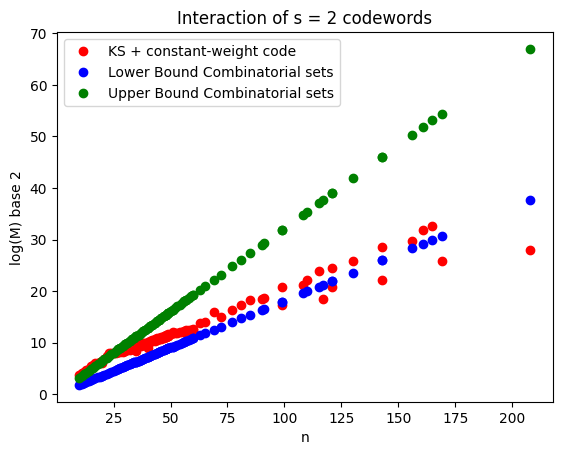

In [ ]:
plt.plot([x[0] for x in All2], [math.log2(x[1]) for x in All2],'ro', label = 'KS + constant-weight code')
plt.plot([x[0] for x in All2], [math.log2(1.134**x[0]) for x in All2],'bo', label = 'Lower Bound Combinatorial sets')
plt.plot([x[0] for x in All2], [math.log2(1.25**x[0]) for x in All2],'go', label = 'Upper Bound Combinatorial sets')
#plt.plot(Length2, Size2, 'ro', label = 'Interaction of s = 2.')
plt.xlabel('n')
plt.ylabel('log(M) base 2')
plt.title("Interaction of s = 2 codewords")
plt.legend()
plt.show()

In [ ]:
# We care about number of items M (# codewords) vs number of tests n (length of each codeword)
All3 = [] # (M,n)
# From Table 1
# From RS code, use trivial substitution
All3 += [(28,7**2),(32,8**2),(49,7**3),(56,8**3),(77,11**3),(90,9**4),(110,11**4),(130,13**4),(160,16**4),(169,13**5),(208,16**5),(256,16**6),(304,19**6),(361,19**7)]
# From Table 2
# From RS code, use constant-weight code substitution.
# We have almost every possible values for n < 50
# Since the table "A New Table of Constant-Weight Code" has the constant weight code for n < 50.
# For n > 50, we need other approach.
All3 += [(16,20),(18,22),(19,25),(20,30),(21,31),(22,37),(23,40),(24,42),(25,50),(26,52),(27,54),(28,63),(29,65),(30,67),(31,76),(32,80),(33,82),(34,92),(35,96),(36,99),(37,111),
         (38,114),(39,117),(40,130),(41,133),(42,136),(43,149),(44,154),(45,157),(46,171),(47,176),(48,180),(49,343)]
# From Table 3
All3 += [(49,7**3),(56,8**3),(77,11**3),(90,9**4),(110,11**4),(130,13**4),(154,37**3),(160,16**4),(169,13**5),(200,29**4),(208,19**5),(247,25**5),(256,19**6),(286,37**5),(304,19**7),
         (352,37**6),(418,25**8),(475,25**9),(550,37**9),(616,37**10),(748,37**12)]

# Update of the lecture on design screening paper
All3 += [(36,103),(37,122),(38,138),(39,156),(40,178),(41,198),(42,220),(43,240),(44,264),(45,290),(46,311),(47,442),(48,350),(49,385),(50,396),(51,406),(52,411),(53,420),(54,457),(55,514),(56,583),(57,589),(58,602),(59,611),(60,621)]
All3 +=  [(10,5),(11,6),(12,9),(13,13),(14,14),(15,15),(17,20)]

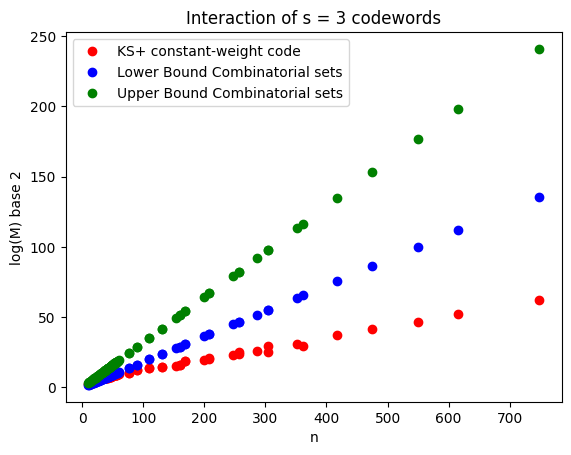

In [ ]:
plt.plot([x[0] for x in All3], [math.log2(x[1]) for x in All3],'ro', label = 'KS+ constant-weight code')
plt.plot([x[0] for x in All3], [math.log2(1.134**x[0]) for x in All3],'bo', label = 'Lower Bound Combinatorial sets')
plt.plot([x[0] for x in All3], [math.log2(1.25**x[0]) for x in All3],'go', label = 'Upper Bound Combinatorial sets')
#plt.plot(Length2, Size2, 'ro', label = 'Interaction of s = 2.')
plt.xlabel('n')
plt.ylabel('log(M) base 2')
plt.title("Interaction of s = 3 codewords")
plt.legend()
plt.show()

$s=4$, then we just need constant-weight code with $3*w = 2*D-1$.

- D = 8, w = 5

A similar result is N=34, M=52, which is slightly better than N=35, M=49.

- D = 14, w= 9


In [ ]:
with open('34_52_code.txt', 'r') as f:
  code_34_52 = f.read().replace('\n', '')
  # split data into substrings of length 34
  code_34_52 = [code_34_52[i:i + 34] for i in range(0, len(code_34_52), 34)]
  # print the substrings
  #print(code_34_52)
print(len(code_34_52))
print('Weight is 5, distance 8.')


52
Weight is 5, distance 8.


# 30 Jan Meeting


In [ ]:
Code_s2_new = sorted([x for x in All2 if not any(x[0]==y[0] and x[1]<y[1] for y in All2)], key=lambda x:x[0])
#print(Code_s2_new)
Code_s3_new = sorted([x for x in All3 if not any(x[0]==y[0] and x[1]<y[1] for y in All3)], key=lambda x:x[0])

In [ ]:
Code_s2_60 = [x for x in Code_s2_new if x[0]<= 60]
Code_s3_60 = [x for x in Code_s3_new if x[0]<= 60]
print(len(Code_s2_60))
print(len(Code_s3_60))

51
51


In [ ]:
# Let construct the table for s=4
# Use constant weight code M = A(N,8,5)
All4 = [(10,2),(11,2),(12,3),(13,3),(14,4),(15,6),(16,6),(17,7),(18,9),(19,12),(20,16),(21,21),(22,21),(23,23),(24,24),(25,30),(26,30),(27,31),(28,33),(29,36),(30,41),(31,43),(32,44),(33,48),(34,52),(35,56),(36,57),(37,65),(38,65),(39,66),(40,72),(41,82),(42,84),(43,86),(44,88),(45,99),(46,99),(47,99),(48,102),(49,108),(50,120),(51,120),(52,123),(53,133),(54,135),(55,143),(56,145),(57,158),(58,158),(59,158),(60,168)]

In [ ]:
# List all MHD4 using in MERFISH for different values of n
# This is actually the A(n,4,4) code
Merfish = [(10,30),(11,35),(12,51),(13,65),(14,91),(15,105),(16,140),(17,157),(18,198),(19,228),(20,285),(21,315),(22,385),(23,419),(24,498),(25,550),(26,650),(27,702),(28,819),(29,877),(30,1005),(31,1085),(32,1240),(33,1320),(34,1496),(35,1583),(36,1773),(37,1887),(38,2109),(39,2223),(40,2470),(41,2593),(42,2856),(43,3010),(44,3311),(45,3465),(46,3795),(47,3959),(48,4308),(49,4508),(50,4900),(51,5100),(52,5525),(53,5737),(54,6183),(55,6435),(56,6930),(57,7182),(58,7714),(59,7979),(60,8535),(61,8845),(62,9455),(63,9765),(64,10416)]
# Theorem 4 in (BSSS) gives a systematic way to compute A(n,4,4) = J1(n,4,4)
def J1_n44_bound(n):
  if n%6 == 2 or n%6 == 4:
    return n*(n-1)*(n-2)/24
  elif n%6 == 1 or n%6 == 3:
    return n*(n-1)*(n-3)/24
  elif n%6 == 0:
    return n*(n*n-3*n-6)/24
  else:
    print('This function is not available for n=5 mod 6.')
    return False

Code_w4_D4 = []
for n in range(10,101):
  if n%6 != 5:
    Code_w4_D4 += [(n, J1_n44_bound(n))]

# Special construction for n=5 mod 6
Code_w4_D4 += [(11,35),(17,157),(23,419),(29,877),(35,1583),(41,2593),(47,3959),(53,5737),(59,7979)]
# Artificial construction for n=5 mod 6 and n > 64
# Need the actual codebook for the one below ??????????
Code_w4_D4 += [(65,10746),(71,14081),(77,18043),(83,22686),(89,28064),(95,34231)]


In [ ]:
n=59+6+6+6+6+6+6
print(n)
print(J1_n44_bound(n))
print(int(min(n*(n-1)*(n-3)/24, n*(n-1)*(n-2)/24, n*(n*n-3*n-6)/24)))

95
This function is not available for n=5 mod 6.
False
34231


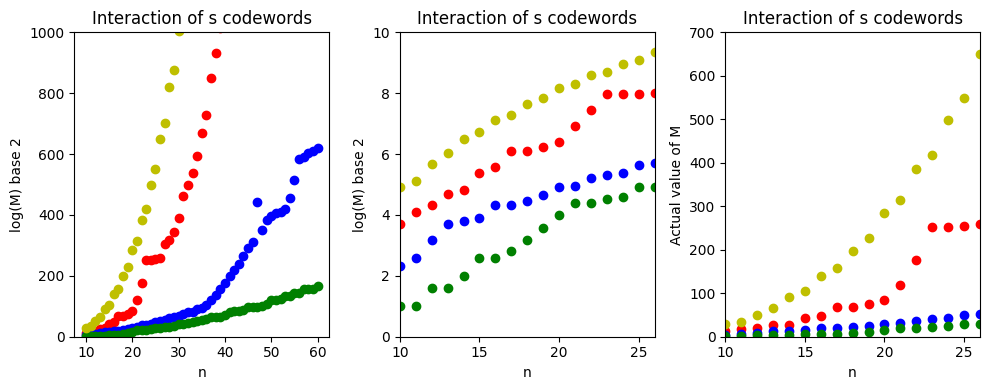

In [ ]:
# Create a figure and two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 4))

# Original plot
plt.subplot(1, 3, 1)
plt.plot([x[0] for x in Code_s2_60], [(x[1]) for x in Code_s2_60],'ro', label = 's=2')
plt.plot([x[0] for x in Code_s3_60], [(x[1]) for x in Code_s3_60],'bo', label = 's=3')
plt.plot([x[0] for x in All4], [(x[1]) for x in All4],'go', label = 's=4')
plt.plot([x[0] for x in Merfish], [(x[1]) for x in Merfish],'yo', label = 's=1, MHD4')
plt.xlabel('n')
plt.ylim(0, 1000)
plt.ylabel('log(M) base 2')
plt.title("Interaction of s codewords")
#plt.legend()

# Zoomed-in plot
plt.subplot(1, 3, 2)
plt.plot([x[0] for x in Code_s2_60], [math.log2(x[1]) for x in Code_s2_60],'ro', label = 's=2')
plt.plot([x[0] for x in Code_s3_60], [math.log2(x[1]) for x in Code_s3_60],'bo', label = 's=3')
plt.plot([x[0] for x in All4], [math.log2(x[1]) for x in All4],'go', label = 's=4')
plt.plot([x[0] for x in Merfish], [math.log2(x[1]) for x in Merfish],'yo', label = 's=1, MHD4')
plt.xlim(10, 26)
plt.ylim(0, 10)
plt.xlabel('n')
plt.ylabel('log(M) base 2')
plt.title("Interaction of s codewords")
#plt.legend()

# Zoomed-in plot
plt.subplot(1, 3,3)
plt.plot([x[0] for x in Code_s2_60], [x[1] for x in Code_s2_60],'ro', label = 's=2')
plt.plot([x[0] for x in Code_s3_60], [x[1] for x in Code_s3_60],'bo', label = 's=3')
plt.plot([x[0] for x in All4], [x[1] for x in All4],'go', label = 's=4')
plt.plot([x[0] for x in Merfish], [x[1] for x in Merfish],'yo', label = 's=1, MHD4')
plt.xlim(10, 26)
plt.ylim(0, 700)
plt.xlabel('n')
plt.ylabel('Actual value of M')
plt.title("Interaction of s codewords")
#plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


All codes here are binary constant weight codes, using the sufficient condition of the $s$-disjunct code
$s*\lambda \leq w-1$. For constant weight code, $D=2(w-\lambda)$. Simply search for constant weight code satisfying $w(s-1)=D*s/2-1$.

All codes for $(s>1)$ given above have its own Hamming distance at least 4, $\{4,6,8,10\}$, and are constant weight codes. The weight are in $\{3,4,5,7\}$.

MHD4 used in MERFISH is constant 4-weight code with distance 4.

Most of the $(s=2)$ codes are constant weight codes of weight 7 and distance 8.
(Some of them follow different constructions to get better $M$).




In [ ]:
print(Code_s2_60[34])
print(2**11-1)

(44, 1806)
2047


In [ ]:
print(list(range(4)))

[0, 1, 2, 3]


23 Feb Meeting

In [ ]:
Code_s2_100 = [x for x in Code_s2_new if x[0]<= 100]
Code_s3_100 = [x for x in Code_s3_new if x[0]<= 100]
print(len(Code_s2_100))
print(len(Code_s3_100))

61
55


In [ ]:
print(Code_s2_100[-1])

(99, 1771561)


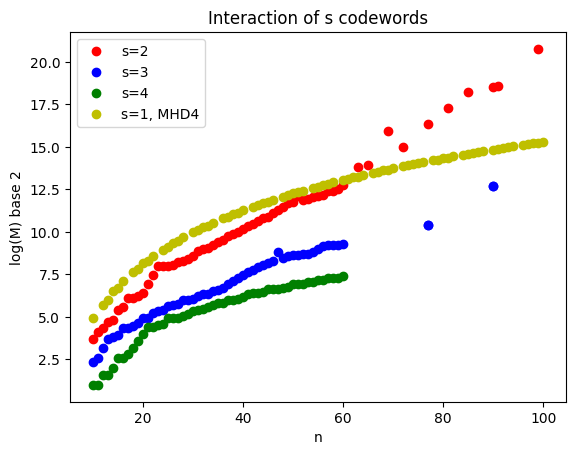

In [ ]:
plt.plot([x[0] for x in Code_s2_100], [math.log2(x[1]) for x in Code_s2_100],'ro', label = 's=2')
plt.plot([x[0] for x in Code_s3_100], [math.log2(x[1]) for x in Code_s3_100],'bo', label = 's=3')
plt.plot([x[0] for x in All4], [math.log2(x[1]) for x in All4],'go', label = 's=4')
plt.plot([x[0] for x in Code_w4_D4], [math.log2(x[1]) for x in Code_w4_D4],'yo', label = 's=1, MHD4')
plt.xlabel('n')
#plt.ylim(0, 1000)
plt.ylabel('log(M) base 2')
plt.title("Interaction of s codewords")
plt.legend()
plt.show()

References: (Get the table first, then find the actual code later)
- https://www.win.tue.nl/~aeb/codes/Andw.html
- A new table of constant weight codes (BSSS)

For a fair comparision, let's compare MHD4 with constant weight codes satisfying $w(s-1)=D*s/2-1$.

- s=1 is trivial, use MHD4.
- s=2, choose (w = 3, D=4), (w=5,D=6), (w=7,D=8) to have a plot.
- s=3, choose (w=4,D=6).

In [ ]:
# Here is the list of constant weight code with w=3, D=4.
#Code_w3_D4 = [(6,4),(7,7),(8,8),(9,12),(10,13),(11,17),(12,20),(13,26),(14,28),(15,35),(16,37),(17,44),(18,48),
#              (19,57),(20,60),(21,70),(22,73),(24,88),(25,100),(26,104),(27,117),(28,121),(29,134),(30,140),
#              (31,155),(32,160),(33,176),(34,181),(35,197),(36,204),(37,222),(38,228),(39,247),(40,253),
#              (41,272),(42,280),(43,301),(44,308),(45,330),(46,337),(47,359),(48,368),(49,392),(50,400),
#              (51,425),(52,433),(53,458),(54,468),(55,495),(56,504),(57,532),(58,541),(59,569),(60,580),
#              (61,610),(62,620),(63,651),(64,661)]
# The above is manual. Below is from Theorem 4 of (BSSS)

In [ ]:
# For all n
# From Theorem 4 of (BSSS), we have A(n,4,3) = J1(n,4,3)
# J1(n,4,3) = floor{n/3*\floor{(n-1/2)}} if n != 5 mod 6
#           or floor{n/3*\floor{(n-1/2)}}-1 if n == 5 mod 6
def floor(n):
  # Take the integer part of n
  return int(n)

def J1_n43_bound(n):
  if n%6 == 5:
    return floor(n/3*floor((n-1)/2))-1
  else:
    return floor(n/3*floor((n-1)/2))

Code_w3_D4 = []
for n in range(6,101):
  if n == 16:
    print( J1_n43_bound(n))
  Code_w3_D4 += [(n, J1_n43_bound(n))]
  #print(n, J1_n43_bound(n))


37


In [ ]:
# Here is the list of constant weight code with w=5, D=6
# I dont find the systematic way to obtain Code_w5_D6, so use manual table
Code_w5_D6 = [(10,6),(11,11),(12,12),(13,18),(14,28),(15,42),(16,48),(17,68),(18,69),(19,76),
              (20,90),(21,108),(22,132),(23,147),(24,168),(25,210),(26,260),(27,260),(28,280),
              (29,315),(30,343),(31,372),(32,416),(33,462),(34,500),(35,544),(36,612),(37,666),
              (38,714),(39,819),(40,871),(41,943),(42,1020),(43,1077),(44,1131),(45,1187),
              (46,1265),(47,1363),(48,1452),(49,1617),(50,1686),(51,1782),(52,1938),(53,2067),
              (54,2148),(55,2355),(56,2414),(57,2565),(58,2639),(59,2869),(60,3036),(61,3306),
              (62,3596),(63,3906)]

In [ ]:
# Here is the list of constant weight code with w=7, D=8
# I dont find the systematic way to obtain Code_w7_D8, so use manual table
Code_w7_D8 = [(14,8),(15,15),(16,16),(17,24),(18,33),(19,52),(20,80),(21,120),(22,176),
              (23,253),(24,253),(25,254),(26,257),(27,303),(28,318),(29,344),(30,289),
              (31,463),(32,500),(33,539),(34,594),(35,670),(36,730),(37,851),(38,932),
              (39,1014),(40,1170),(41,1287),(42,1394),(43,1591),(44,1806),(45,1867),
              (46,2181),(47,2516),(48,2872),(49,3288),(50,3445),(51,3608),(52,3795),
              (53,3978),(54,4168),(55,4337),(56,4673),(57,5027),(58,5400),(59,5779),
              (60,5895),(61,6659),(62,7506),(63,8444),(64,9480)]


In [ ]:
def distance(a,b):
  dist = 0
  for i in range(len(a)):
    if a[i] != b[i]:
      dist += 1
  return dist
distance('110011000010','001100001011')

def min_dist_code(Code):
  min_dist = len(Code[0])
  for x in Code:
    for y in Code:
      if y != x:
        if min_dist > distance(x,y):
          min_dist = distance(x,y)
  return min_dist

code = ['10000','00100','00001','10100','10001','00101']
print(min_dist_code(code))

1


1


In [ ]:
# How can find values for large n???? just using constant weight code
# How can find values for large n???? using reed-solomon code
a = '110011000010'
Code = ['110011000010']
for i in range(12):
  Code += [Code[i][1:12]+ Code[i][0]]

def min_dist_code(Code):
  min_dist = len(Code[0])
  for x in Code:
    for y in Code:
      if y != x:
        if min_dist > distance(x,y):
          min_dist = distance(x,y)
  return min_dist

print(min_dist_code(Code))

6


In [ ]:
# Fortunately, A(n,6,4) = J1(n,6,4) for all n execpt 8,9,10,11,17,19 only.

In [ ]:
Code_w4_D6 = []
for n in range(12,101):
  if n == 16:
    print(floor(n/4*floor((n-1)/3)))
  Code_w4_D6 += [(n, floor(n/4*floor((n-1)/3)))]

#print(Code_w4_D6)


20


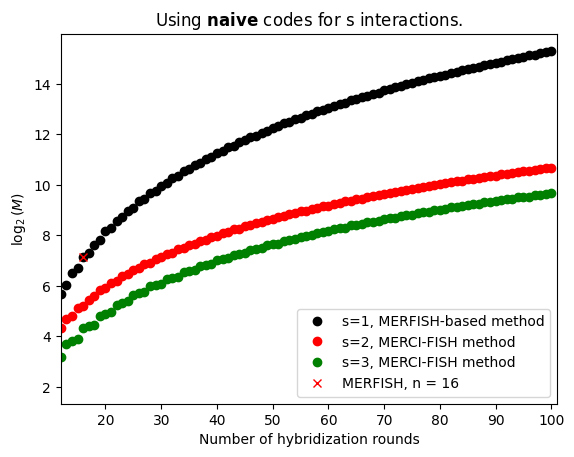

In [ ]:
plt.plot([x[0] for x in Code_w4_D4], [math.log2(x[1]) for x in Code_w4_D4],'ko', label = 's=1, MERFISH-based method')
plt.plot([x[0] for x in Code_w3_D4], [math.log2(x[1]) for x in Code_w3_D4],'ro', label = 's=2, MERCI-FISH method')
plt.plot([x[0] for x in Code_w4_D6], [math.log2(x[1]) for x in Code_w4_D6],'go', label = 's=3, MERCI-FISH method')
plt.plot(16,math.log2(140), 'rx', label='MERFISH, n = 16')
#plt.plot(16,math.log2(20), 'kx')
#plt.plot(16,math.log2(37), 'kx')
plt.xlabel('Number of hybridization rounds')
plt.xlim(12, 101)
plt.ylabel(r'$\log_2(M)$')
plt.title(r'Using $\mathbf{naive}$ codes for s interactions.')
plt.legend()
plt.show()

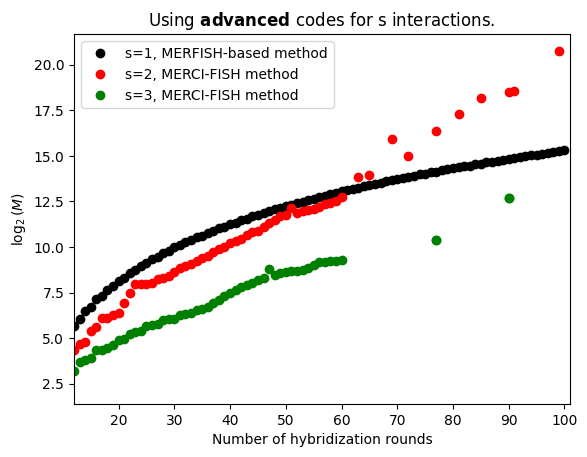

In [ ]:
plt.plot([x[0] for x in Code_w4_D4], [math.log2(x[1]) for x in Code_w4_D4],'ko', label = 's=1, MERFISH-based method')
plt.plot([x[0] for x in Code_s2_100], [math.log2(x[1]) for x in Code_s2_100],'ro', label = r's=2, MERCI-FISH method')
plt.plot([x[0] for x in Code_s3_100], [math.log2(x[1]) for x in Code_s3_100],'go', label = r's=3, MERCI-FISH method')
#plt.plot([x[0] for x in Code_w4_D6], [math.log2(x[1]) for x in Code_w4_D6],'go', label = 's=3,w=4,D=6')
plt.xlabel('Number of hybridization rounds')
plt.xlim(12, 101)
plt.ylabel(r'$\log_2(M)$')
plt.title(r'Using $\mathbf{advanced}$ codes for s interactions.')
plt.legend()
plt.show()

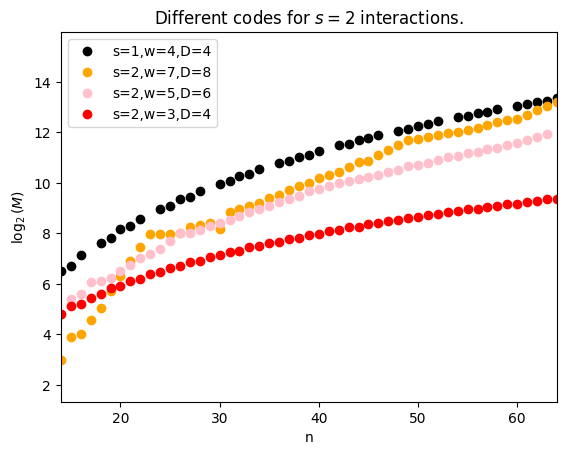

In [ ]:
plt.plot([x[0] for x in Code_w4_D4], [math.log2(x[1]) for x in Code_w4_D4],'ko', label = 's=1,w=4,D=4')
plt.plot([x[0] for x in Code_w7_D8], [math.log2(x[1]) for x in Code_w7_D8],'o',color='orange', label = 's=2,w=7,D=8')
plt.plot([x[0] for x in Code_w5_D6], [math.log2(x[1]) for x in Code_w5_D6],'o',color='pink', label = 's=2,w=5,D=6')
plt.plot([x[0] for x in Code_w3_D4], [math.log2(x[1]) for x in Code_w3_D4],'o',color='red', label = 's=2,w=3,D=4')
plt.xlabel('n')
plt.xlim(14, 64)
plt.ylabel(r'$\log_2(M)$')
plt.title("Different codes for $s=2$ interactions.")
plt.legend()
plt.show()

# 23 Feb Meeting

In [ ]:
def BSSS_43(n):
  if n%6 == 5:
    output = math.floor(n/3*math.floor((n-1)/2))-1
  else:
     output = math.floor(n/3*math.floor((n-1)/2))
  return output
print(BSSS_43(43))

301


This is Johnson bound. How to get the construction?

In [ ]:
def Johnson(n,d,w):
  if 2*w < d:
    return 1
  elif n == w:
    return 1
  elif d==2:
    return math.comb(n,w)
  elif math.floor(n/w*Johnson(n-1,d,w-1)) < math.floor(n/(n-w)*Johnson(n-1,d,w)):
    return math.floor(n/w*Johnson(n-1,d,w-1))
  else:
    return math.floor(n/(n-w)*Johnson(n-1,d,w))

print(Johnson(43,6,4))

149


In [ ]:
# Create CWC A(43,6,4)=149
# Equivalent to 2-(43,4,1) packing
# From pairwise balanced design B({4,7*},1,43)
# where all blocks are of size 4 except a block of size 7. Every pair
# occurs exactly once in each block.

# Idea
# Start from 0, form all possible 4-block. Then continue.

element = [i for i in range(43)]
# Initialize code
code = []

# Add blocks containing 0
code += [[0,x,x+1,x+2] for x in range(1,43,3)]
print(code)

# Add blocks containing 1
for x in code:
  if 1 in x and 2 in x:
    print(x)



[[0, 1, 2, 3], [0, 4, 5, 6], [0, 7, 8, 9], [0, 10, 11, 12], [0, 13, 14, 15], [0, 16, 17, 18], [0, 19, 20, 21], [0, 22, 23, 24], [0, 25, 26, 27], [0, 28, 29, 30], [0, 31, 32, 33], [0, 34, 35, 36], [0, 37, 38, 39], [0, 40, 41, 42]]
[0, 1, 2, 3]


In [ ]:
from itertools import combinations

def construct_combinations(n):
    elements = list(range(n + 1))
    combinations_list = []

    # Generate all combinations of 4 elements
    for combination in combinations(elements, 4):
        # Check if the combination has no repeating pairs
        if len(set(pair for pair in combinations(combination, 2))) == 6:
            combinations_list.append(combination)

    return combinations_list

# Example usage:
n = 5
result = construct_combinations(n)
print(result)
print(len(result))

[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 4, 5), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 4, 5), (0, 3, 4, 5), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5)]
15


The codeboook file RS0083

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving codebook.csv to codebook.csv


In [ ]:
import pandas as pd

# Replace 'filename.csv' with the name of your CSV file
df = pd.read_csv('codebook.csv',delimiter=',',skiprows= [0,1])

# Display the first few rows of the DataFrame

print(df.iloc[:20, :df.columns.get_loc(' RS0095') + 1])

#print(df.iloc[:20, df.columns.get_loc(' RS0083')])


In [ ]:
barcode_0083 = []
for i in range(1,len(df)):
  barcode_0083 += [df.at[i,' RS0083']]
print(len(barcode_0083))
print(barcode_0083[0][1])


In [ ]:
def Hamming_dist(word1, word2):
  # 2 binary words of same length
  distance = 0
  for i in range(len(word1)):
    if word1[i] != word2[i]:
      distance += 1
  return distance

def weight(word):
  # binary string
  count = 0
  for x in word:
    if x == '1': count += 1
  return count

min_Hamming_dist = len(barcode_0083[0])
print(min_Hamming_dist)
# The first position is blank
for x in barcode_0083:
  if weight(x) != 4:
    print(False)
  for y in barcode_0083:
    if y!=x:
      if Hamming_dist(x,y) < min_Hamming_dist:
        min_Hamming_dist = Hamming_dist(x,y)
print(min_Hamming_dist)

# This is 140 words of length 16, weigth 4, distance 4

In [ ]:
# Now let's add code to RS0095 column
df.at[0, ' RS0095'] = 'A(47,6,4)'
for i in range(1,141):
  df.at[i, ' RS0095'] = convert_BD_word(result[i],47)

In [ ]:
print(result[0])
# convert from block design to binary word
def convert_BD_word(BD,n):
  # input a block design over n items
  output = ''
  for i in range(n):
    if i in BD: output += '1'
    else: output+='0'
  return output
print(convert_BD_word(result[0],47))

In [ ]:
print(df.iloc[:20, :df.columns.get_loc(' RS0095') + 1])

In [ ]:
min_Hamming_dist = len(df.at[1, ' RS0095'])
print(min_Hamming_dist)
for x in df[' RS0095'].iloc[1:140]:
  if weight(x) != 4:
    print(False)
  for y in df[' RS0095'].iloc[1:140]:
    if y!=x:
      if Hamming_dist(x,y) < min_Hamming_dist:
        min_Hamming_dist = Hamming_dist(x,y)
print(min_Hamming_dist)

# This is 140 words of length 16, weigth 4, distance 4

47
6


In [ ]:
df.to_csv('codebook_(47,6,4).csv', index=False)

In [ ]:
def construct_combinations(n):
    elements = list(range(n))
    combinations_list = []

    # Generate all combinations of 4 elements
    for combination in combinations(elements, 4):
        # Check if every pair of tuples in the list has at most 1 common element
        is_valid = True
        for existing_combination in combinations_list:
            common_elements = set(combination) & set(existing_combination)
            if len(common_elements) > 1:
                is_valid = False
                break
        if is_valid:
            combinations_list.append(combination)

    return combinations_list

# Example usage:
n = 43
result = construct_combinations(n)
print(len(result))
#print(result)

113


In [ ]:
#!/usr/bin/env python3
'''Generate modified Hamming code by dynamic programing.
The method is deterministic. However, this method is not
recommanded because recursive code is slow in python and
the method does not guarantee optimal solution in most cases.

# Hopefully, we can improve this routine.

A t-(v,k,1) packing with b blocks is equivalent to a binary coce of length v,
size b, constant k, and minimum Hamming distance at least 2(k-t+1).

Author: Xingjie Pan
'''

def H_dist(code1:set, code2:set):
    return len(code1.union(code2)) - len(code1.intersection(code2))

def generate_modified_hamming_codes(length:int, n_on_bits:int, dist_cut:int):
    '''Generate a complete set of modified hamming codes.
    A complete set is a set that adding any extra code would
    break the required distance rule.

    Arguments:
        length: length of a code.
        n_on_bits: number of bits that are 1 for each code.
        dist_cut: the minimum distance between codes.

    Return:
        code_list: a list of the complete code set.
    '''
    assert(length > 0 and 0 <= n_on_bits <= length)

    code_list = []
    chosen_on_bits = set()

    gen_MHC_recursive(length, n_on_bits, dist_cut, code_list, chosen_on_bits)

    print(f'Generated a list of {len(code_list)} codes.')
    return code_list

def gen_MHC_recursive(length:int, n_on_bits:int, dist_cut:int, code_list:list, chosen_on_bits:set,
        print_depth:int=1):
    '''Generate modified hamming codes recursively.'''

    # If enough on-bits are chosen, add the code to the list
    if len(chosen_on_bits) == n_on_bits:
        code_list.append(chosen_on_bits)
        return

    # Find the candidates for the next on-bit

    on_bit_candidates = [i for i in range(length) if not i in chosen_on_bits]

    # The number of on bits after this round of addition

    n_rest_on_bits = n_on_bits - len(chosen_on_bits) - 1

    # Test all on-bit candidates

    for on_bit in on_bit_candidates:
        new_chosen_on_bits = chosen_on_bits.copy()
        new_chosen_on_bits.add(on_bit)

        #if len(new_chosen_on_bits) <= print_depth:
        #    print(f'Testing partial set {new_chosen_on_bits}')

        ok_to_proceed = True

        # Compare the partly determined code to the existing codes

        for existing_code in code_list:
            Hd = H_dist(existing_code, new_chosen_on_bits)

            # Give up the partly determined code if the max possible distance is still smaller than the cutoff
            if Hd + n_rest_on_bits < dist_cut:
                ok_to_proceed = False
                break

        if ok_to_proceed:
            gen_MHC_recursive(length, n_on_bits, dist_cut, code_list, new_chosen_on_bits)

if __name__ == '__main__':
    code_list = generate_modified_hamming_codes(43, 4, 6)
    print(len(code_list))

Generated a list of 113 codes.
113


In [ ]:
#!/usr/bin/env python3
'''Generate modified Hamming code by randomly choosing codes.
Multiple people from the Zhuang lab contributed to this version
including Bogdan Bintu, Po Zheng, Will Allen and Xingjie Pan.
'''
import numpy as np
from itertools import combinations
from time import time
from multiprocessing import Pool


def H_dist(code1:set, code2:set):
    return len(code1.union(code2)) - len(code1.intersection(code2))

def bit_coverage(code_list:list, code_length):
    coverages = np.zeros(code_length)

    for code in code_list:
        for bit in code:
            coverages[bit] += 1

    return coverages

def generate_one_code_set(n_bits, n_on_bits, min_hamming_distance, randomize, verbose):
    '''Randomly generate one set of codes.'''
    # Re-seed the generator for each thread
    np.random.seed()

    # Get all possible codes with n_bits and n_on_bits
    candidate_codes = list(combinations(list(range(n_bits)), n_on_bits))
    if randomize:
        np.random.shuffle(candidate_codes)

    # Iterate through all codes
    chosen_codes = []
    while len(candidate_codes) > 0:
        c = set(candidate_codes.pop(0))

        # Keep the code if compatible
        keep = True
        for chosen_c in chosen_codes:
            if H_dist(c, chosen_c) < min_hamming_distance:
                keep = False
                break
        if keep:
            chosen_codes.append(c)

    coverages = bit_coverage(chosen_codes, n_bits)

    if verbose:
        print(f'Generated code set: len={len(chosen_codes)}, var={np.var(coverages)}')

    return chosen_codes


def generate_modified_hamming_codes(n_bits:int, n_on_bits:int, min_hamming_distance:int,
        min_codebook_size:int=0, n_rand_repeats:int=500, n_threads:int=1, verbose=True):
    '''Generate code sets and pick the best one.
    The code sets include a regular one plus n_rand_repeats random sets.
    '''

    def code_set_score(size, var):
        '''Score the code set based on its size and variance.
        The higher the better.
        '''
        return size - 5 * var

    start = time()

    best_coding = []
    best_var = np.inf

    # Generate code sets in parallel
    n_repeats = 1 + n_rand_repeats

    args = [[n_bits, n_on_bits, min_hamming_distance, True, verbose] for i in range(n_repeats)]
    args[0][3] = False # Don't randomize the first set

    with Pool(n_threads) as p:
        all_code_sets = p.starmap(generate_one_code_set, args)

    # Find the best code set
    for i in range(n_repeats):

        chosen_codes = all_code_sets[i]

        # Count the coverage for each bit

        coverages = bit_coverage(chosen_codes, n_bits)

        # Update the best code set if the current set is better in both size and variance

        if len(chosen_codes) > min_codebook_size and \
                code_set_score(len(chosen_codes), np.var(coverages)) > code_set_score(len(best_coding), best_var):
            best_coding = chosen_codes
            best_var = np.var(coverages)

    #print(f'The best code set has {len(best_coding)} codes. The coverage variance is {best_var}.')

    end = time()
    print("-- Duration: ", end-start)

    return best_coding


if __name__ == '__main__':
    code_list = generate_modified_hamming_codes(43, 4, 6, n_rand_repeats=50, n_threads=2)
    print(len(code_list))

Generated code set: len=117, var=0.5213628988642509
Generated code set: len=113, var=3.412655489453759
Generated code set: len=119, var=0.4835045970795024
Generated code set: len=117, var=0.5678745267712276
Generated code set: len=121, var=0.5624661979448351
Generated code set: len=117, var=0.5213628988642509
Generated code set: len=119, var=0.3904813412655489
Generated code set: len=118, var=0.58085451595457
Generated code set: len=116, var=0.49107625743645217
Generated code set: len=119, var=0.8090859924283396
Generated code set: len=117, var=0.42833964305029737
Generated code set: len=118, var=0.58085451595457
Generated code set: len=118, var=0.7203893996755002
Generated code set: len=117, var=0.7539210383991346
Generated code set: len=118, var=0.6273661438615468
Generated code set: len=122, var=0.599242833964305
Generated code set: len=121, var=0.6554894537587888
Generated code set: len=117, var=0.47485127095727414
Generated code set: len=121, var=0.5624661979448352
Generated code 

In [ ]:
#!/usr/bin/env python3
'''Can we modify this routine to generate all Balanced Incomplete block design
'''

def H_dist(code1:set, code2:set):
    return len(code1.union(code2)) - len(code1.intersection(code2))

def generate_packing(length:int, n_on_bits:int, t_design:int):
    '''Generate a complete set of t-(v,k,1) packing.
    A complete set is a set that adding any extra code would
    break the required packing rule.

    Arguments:
        length: v, number of points.
        n_on_bits: k, number of points in a block.
        t_design: t, any t-subset

    Return:
        code_list: a list of the complete code set.
    '''
    assert(length > 0 and 0 <= n_on_bits <= length)

    code_list = []
    chosen_on_bits = set()

    gen_packing_recursive(length, n_on_bits, code_list, chosen_on_bits, t_design)

    print(f'Generated a list of {len(code_list)} codes.')
    return code_list

def gen_packing_recursive(length:int, n_on_bits:int, code_list:list, chosen_on_bits:set, t_design:int,
        print_depth:int=1):
    '''Generate modified hamming codes recursively.'''

    # If enough on-bits are chosen, add the code to the list
    if len(chosen_on_bits) == n_on_bits:
        code_list.append(chosen_on_bits)
        return

    # Find the candidates for the next on-bit

    on_bit_candidates = [i for i in range(length) if not i in chosen_on_bits]

    # Test all on-bit candidates

    for on_bit in on_bit_candidates:
        new_chosen_on_bits = chosen_on_bits.copy()
        new_chosen_on_bits.add(on_bit)

        #if len(new_chosen_on_bits) <= print_depth:
        #    print(f'Testing partial set {new_chosen_on_bits}')

        ok_to_proceed = True

        # Compare the partly determined code to the existing codes

        for existing_code in code_list:
            intersect = len(existing_code.intersection(new_chosen_on_bits))

            # Give up the partly determined code if the max possible distance is still smaller than the cutoff
            if intersect > t_design-1: # Here is the t
                ok_to_proceed = False
                break

        if ok_to_proceed:
            gen_packing_recursive(length, n_on_bits, code_list, new_chosen_on_bits, t_design)

if __name__ == '__main__':
    code_list = generate_packing(10, 6,4)
    print(code_list)

Generated a list of 5 codes.
[{0, 1, 2, 3, 4, 5}, {0, 1, 2, 6, 7, 8}, {0, 3, 4, 6, 7, 9}, {1, 3, 5, 6, 8, 9}, {2, 4, 5, 7, 8, 9}]


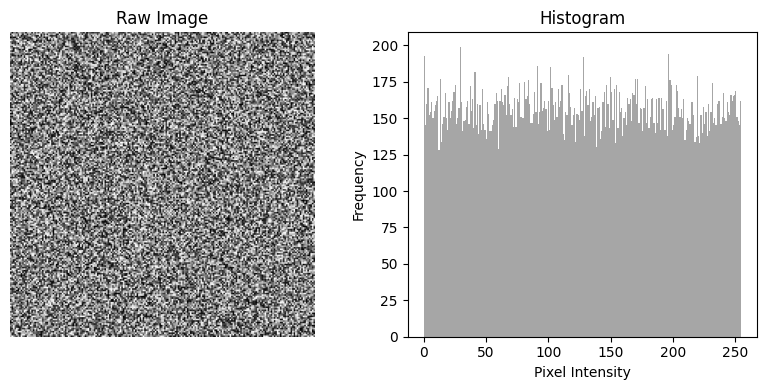

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic grayscale image with random pixel intensities
np.random.seed(0)
image = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)

# Plot the image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Raw Image')
plt.axis('off')

# Plot the histogram
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
2048**2

4194304

In [ ]:
import numpy as np

# Example vector
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Specify the percentile(s) you're interested in
percentile = 90  # For example, 90th percentile

# Compute the upper percentile value(s)
upper_percentile = np.percentile(data, percentile)

print("Upper percentile value:", upper_percentile)
print(data.shape)

Upper percentile value: 9.1
(10,)


In [ ]:
with open('test.txt', 'r') as file:
  row_number = 1
  # Count the number of lines
  num_lines = sum(1 for line in file)
  # Iterate over each line in the file
  for current_row, line in enumerate(file, start=1):
      # Check if the current row matches the desired row number
      if current_row == row_number:
          # Return the line (row)
        print(line.strip())  # Remove leading/trailing whitespace
# If the desired row is not found, return None
  print(num_lines)

325


In [ ]:
def load_txt_file(filename):
    # Initialize an empty list to store the rows
    rows = []

    # Open the file in read mode
    with open(filename, 'r') as file:
        # Read each line in the file
        for line in file:
            # Append the line (row) to the list, removing leading/trailing whitespace
            parts =line.strip().split('=')
            rows.append(float(parts[-1]))
    # Return the list of rows
    return rows

# Example usage:
filename = 'test.txt'  # Replace 'example.txt' with the path to your text file
data = load_txt_file(filename)
print("Data loaded from file:")
print(data)

Data loaded from file:
[342.67, 82.56, 120.305, 185.775, 36.325, 78.255, 90.515, 37.99, 34.105, 69.81, 34.97, 37.735, 30.53, 15.605, 15.99, 90.75, 49.765, 19.285, 24.395, 21.175, 14.375, 26.125, 19.845, 36.85, 21.525, 15.785, 18.37, 70.06, 1.875, 27.27, 10.11, 46.12, 2.77, 12.235, 17.365, 30.275, 52.235, 10.925, 6.745, 10.86, 16.735, 13.31, 21.08, 12.2, 52.255, 11.75, 12.09, 22.855, 7.035, 4.415, 18.545, 5.98, 25.755, 15.45, 10.795, 9.09, 3.68, 15.84, 4.555, 16.61, 5.64, 26.725, 6.98, 32.07, 4.68, 14.415, 8.765, 4.765, 3.495, 4.135, 24.0, 7.275, 16.41, 35.63, 21.145, 16.135, 58.45, 2.755, 11.83, 23.255, 15.425, 10.785, 5.505, 1.915, 2.645, 13.115, 20.9, 25.78, 6.64, 102.26, 11.775, 13.755, 4.935, 7.24, 2.49, 8.22, 17.55, 9.67, 13.83, 13.655, 12.14, 11.565, 2.51, 5.865, 6.29, 11.265, 6.6, 3.565, 7.6, 16.0, 5.69, 4.82, 16.97, 15.365, 9.415, 741.31, 5.125, 8.59, 11.375, 2.91, 0.76, 4.99, 0.025, 14.565, 7.645, 24.82, 15.68, 4.8, 18.785, 1.705, 6.225, 6.405, 5.275, 3.65, 4.455, 17.965, 12.5

In [ ]:
import numpy as np

# Example array
normalized_array = np.array([0.1, 0.5, 1.2, -0.3, 0.8])

# Clip the values to be within the range [0, 1]
clip_lower = 0
clip_upper = 1
np.clip(normalized_array, clip_lower, clip_upper, out=normalized_array)

print("Clipped array:", normalized_array)

Clipped array: [0.1 0.5 1.  0.  0.8]


In [ ]:
import numpy as np

# Example array
unitnormalized_array = np.random.randn(1,2, 2,3)  # Example array with shape (2,3)
print(unitnormalized_array)
# Compute the norm along the fourth axis
norm_array = np.linalg.norm(unitnormalized_array, axis=3)

print("Norm array:", norm_array)


[[[[ 0.60671389 -1.04678719  1.22452602]
   [-0.94875431  0.58641852 -0.40058424]]

  [[-0.56628715  1.11405234  0.06426205]
   [ 1.08018534 -0.30846624 -0.61052735]]]]
Norm array: [[[1.72143229 1.18511145]
  [1.25136859 1.27855208]]]


In [ ]:
import numpy as np

# Example vector
x = np.array([1, 2, 3])

# Compute the 2-norm (Euclidean norm) of the vector
norm_2 = np.linalg.norm(x)
print("2-norm of the vector:", norm_2)

# Example matrix
A = np.array([[1, 2], [3, 4]])

# Compute the Frobenius norm of the matrix
frobenius_norm = np.linalg.norm(A)
print("Frobenius norm of the matrix:", frobenius_norm)

# Compute the 1-norm of each column of the matrix
column_1_norm = np.linalg.norm(A, axis=0)
print("1-norm of each column:", column_1_norm)


2-norm of the vector: 3.7416573867739413
Frobenius norm of the matrix: 5.477225575051661
1-norm of each column: [3.16227766 4.47213595]


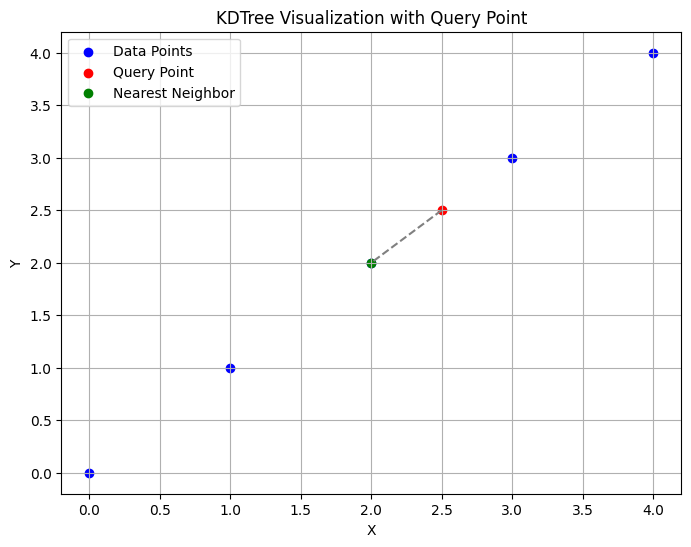

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

# Example dataset
data = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]])

# Construct a KDTree from the dataset
kdtree = KDTree(data)

# Query point
query_point = np.array([2.5, 2.5])

# Find the nearest neighbor to the query point
nearest_neighbor_distance, nearest_neighbor_index = kdtree.query(query_point)

# Plot the KDTree and query point
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')

# Plot the query point
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point')

# Plot the nearest neighbor
plt.scatter(data[nearest_neighbor_index, 0], data[nearest_neighbor_index, 1], color='green', label='Nearest Neighbor')

# Plot lines connecting query point and nearest neighbor
plt.plot([query_point[0], data[nearest_neighbor_index, 0]], [query_point[1], data[nearest_neighbor_index, 1]], color='gray', linestyle='--')

# Add legend and labels
plt.legend()
plt.title('KDTree Visualization with Query Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


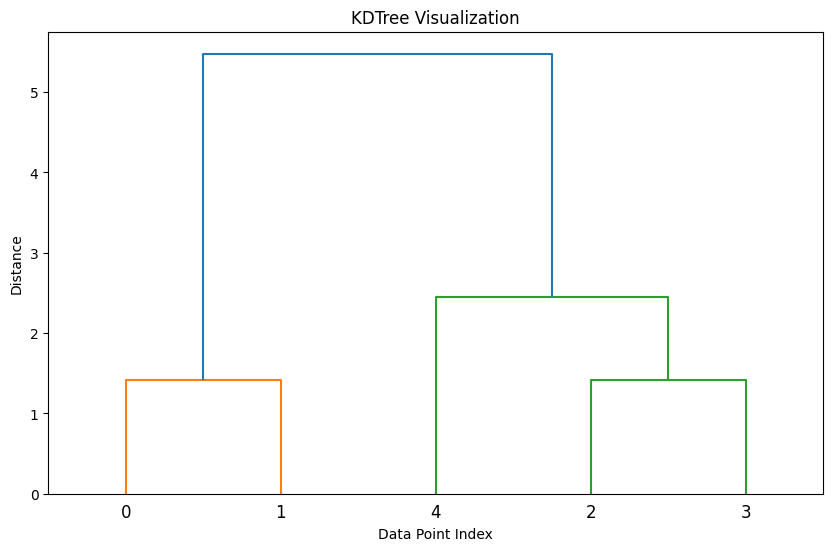

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

def plot_kdtree(tree, data):
    # Compute the hierarchical clustering
    Z = hierarchy.linkage(tree.data, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    hierarchy.dendrogram(Z)
    plt.title('KDTree Visualization')
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    plt.show()

# Example dataset
data = [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]

# Construct a KDTree from the dataset
kdtree = KDTree(data)

# Plot the KDTree
plot_kdtree(kdtree, data)

In [ ]:
math.sqrt(.5)

0.7071067811865476

# 8 March Meeting